Logistic Classification
=======================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

This tour details the logistic classification method (for 2 classes and
multi-classes).


_Warning:_ Logisitic classification is actually called ["logistic
regression"](https://en.wikipedia.org/wiki/Logistic_regression) in the literature, but it is in fact a classification method.


We recommend that after doing this Numerical Tours, you apply it to your
own data, for instance using a dataset from [LibSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/).

_Disclaimer:_ these machine learning tours are intended to be
overly-simplistic implementations and applications of baseline machine learning methods.
For more advanced uses and implementations, we recommend
to use a state-of-the-art library, the most well known being
[Scikit-Learn](http://scikit-learn.org/)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

We define a few helpers.

In [2]:
def find(x): return np.nonzero(x)[0]

Two Classes Logistic Classification
-----------------------------------
Logistic classification is, with [support vector machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine), the baseline
method to perform classification. Its main advantage over SVM is that is
is a smooth minimization problem, and that it also output class
probabity, offering a probabilistic interpretation of the classification.


To understand the behavior of the method, we generate synthetic data
distributed according to a mixture of Gaussian with an overlap governed by an offset $\omega$.
 Here classes indexes are set to $y_i \in
\{-1,1\}$ to simplify the equations.

In [39]:
n = 1000 # number of sample
p = 2 # dimensionality
omega = np.array([1,.5])*2.5 # offset 
n1 = int(n/2)
X = np.vstack(( np.random.randn(n1,2), np.random.randn(n1,2)+np.ones([n1,1])*omega ))
y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))

Plot the classes.

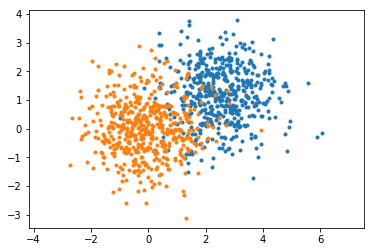

In [40]:
I = find(y==-1)
J = find(y==1)
plt.clf
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal');

Logistic classification minimize a logistic loss in place of the usual
$\ell^2$ loss for regression
  $$ \umin{w} E(w) \eqdef \frac{1}{n} \sum_{i=1}^n L(\dotp{x_i}{w},y_i)  $$
where the logistic loss reads
  $$ L( s,y ) \eqdef \log( 1+\exp(-sy) ) $$
This corresponds to a smooth convex minimization. If $X$ is injective,
this is also strictly convex, hence it has a single global minimum.


Compare the binary (ideal) 0-1 loss, the logistic loss and the
<https://en.wikipedia.org/wiki/Hinge_loss hinge loss>
(the one used for SVM).

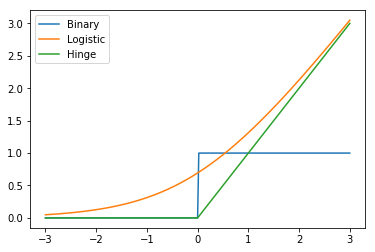

In [41]:
t = np.linspace(-3,3,255).transpose()
plt.clf
plt.plot(t, t>0)
plt.plot(t, np.log(1+np.exp(t)))
plt.plot(t, np.maximum(t,0) )
plt.axis('tight');
plt.legend(['Binary', 'Logistic', 'Hinge']);

This can be interpreted as a <https://en.wikipedia.org/wiki/Maximum_likelihood_estimation maximum likelihood estimator> when one
models the probability of  belonging to the two classes for sample $x_i$ as
  $$ h(x_i) \eqdef (\th(x_i),1-\th(x_i)) \qwhereq
          \th(s) \eqdef \frac{e^{s}}{1+e^s} = (1+e^{-s})^{-1}  $$


Re-writting the energy to minimize
  $$ E(w) = \Ll(X w,y) \qwhereq \Ll(s,y)= \frac{1}{n}  \sum_i L(s_i,y_i), $$
its gradient reads
  $$ \nabla E(w) = X^\top \nabla \Ll(X w,y)
      \qwhereq
      \nabla \Ll(s,y) = \frac{y}{n} \odot \th(-y \odot s),   $$
where $\odot$ is the pointwise multiplication operator, i.e. * in
Python.


Define the energies.

In [42]:
def L(s,y):  return 1/n * sum( np.log( 1 + np.exp(-s*y) ) )
def E(w,X,y): return L(X.dot(w),y);

Define their gradients.

In [43]:
def theta(v): return 1 / (1+np.exp(-v))
def nablaL(s,r): return - 1/n * y * theta(-s * y)
def nablaE(w,X,y): return X.transpose().dot( nablaL(X.dot(w),y) )

_Important:_ in order to improve performance, it is important (especially
in low dimension $p$) to add a constant bias term $w_{p+1} \in \RR$, and replace $\dotp{x_i}{w}$
by $ \dotp{x_i}{w} + w_{p+1} $.  This is equivalently achieved by
adding an extra $(p+1)^{\text{th}}$ dimension equal to 1 to each
$x_i$, which we do using a convenient macro.

In [44]:
def AddBias(X): return np.hstack(( X, np.ones((np.size(X,0),1)) ))

With this added bias term, once $w_{\ell=0} \in \RR^{p+1}$ initialized
(for instance at $0_{p+1}$),

In [45]:
w = np.zeros((p+1,1))

Perform one step of gradient descent reads
$$ w_{\ell+1} = w_\ell - \tau_\ell \nabla E(w_\ell). $$

In [73]:
tau = 1; # here we are using a fixed tau
w = w - tau * nablaE(w,AddBias(X),y)

$$\tau < \frac{2}{L}$$
$$ L \leq \frac{1}{4}\norm{X}^2 $$
If one chooses 
$$\tau < \tau_{\max} \eqdef \frac{2}{\frac{1}{4}\norm{X}^2},$$
then one is sure that the gradient descent converges.

In [82]:
np.linalg.norm(X)
tau_max = 2/(1/4 * np.linalg.norm(AddBias(X), 2)**2 )
print(tau_max)

0.0014965184333816531


__Exercise 1__

Implement a gradient descent
$$ w_{\ell+1} = w_\ell - \tau_\ell \nabla E(w_\ell). $$
Monitor the energy decay.
Test different step size, and compare with the theory (in particular
plot in log domain to illustrate the linear rate).
etAR(1);
etAR(1);

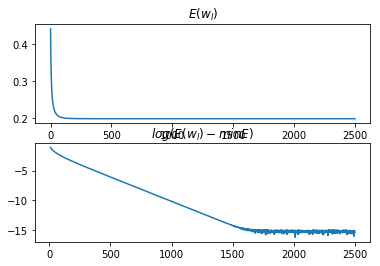

In [75]:
run -i nt_solutions/ml_3_classification/exo1

In [76]:
print(w)

[[-2.41929334]
 [-1.0750284 ]
 [ 3.65553274]]


In [77]:
## Insert your code here.

Generate a 2D grid of points.

In [78]:
q = 201
tx = np.linspace( X[:,0].min(), X[:,0].max(),num=q) 
ty = np.linspace( X[:,1].min(), X[:,1].max(),num=q) 
[B,A] = np.meshgrid( ty,tx )
G = np.vstack([A.flatten(), B.flatten()]).transpose()

Evaluate class probability associated to weight vectors on this grid.

In [79]:
Theta = theta(AddBias(G).dot(w))
Theta = Theta.reshape((q,q))

Display the data overlaid on top of the
classification probability, this highlight the
separating hyperplane $ \enscond{x}{\dotp{w}{x}=0} $.

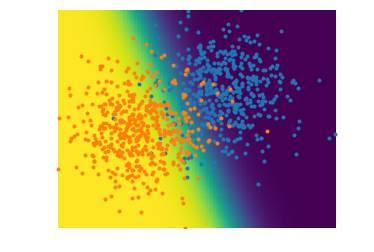

In [80]:
plt.clf
plt.imshow(Theta.transpose(), origin="lower",  extent=[tx.min(),tx.max(),ty.min(),ty.max()])
plt.axis('equal')
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('off');

__Exercise 2__

Test the influence of the separation offset $\omega$ on the result.

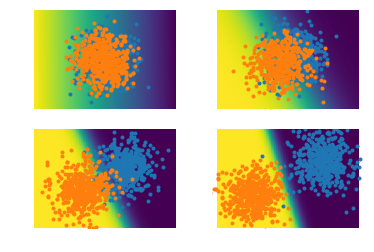

In [27]:
run -i nt_solutions/ml_3_classification/exo2

In [28]:
## Insert your code here.

__Exercise 3__

Test logistic classification on a real life dataset. You can look at the Numerical Tour on stochastic gradient descent
for an example. Split the data in training and testing to evaluate the
classification performance, and check the impact of regularization.

In [29]:
run -i nt_solutions/ml_3_classification/exo3

In [19]:
## Insert your code here.

Kernelized Logistic Classification
----------------------------------
Logistic classification tries to separate the classes using
a linear separating hyperplane $ \enscond{x}{\dotp{w}{x}=0}. $


In order to generate a non-linear descision boundary, one can replace the
parametric linear model by a non-linear [non-parametric](https://en.wikipedia.org/wiki/Nonparametric_statistics) model, thanks to
kernelization. It is non-parametric in the sense that the number of
parameter grows with the number $n$ of sample (while for the basic
method, the number of parameter is $p$. This allows in particular to
generate decision boundary of arbitrary complexity.


The downside is that the numerical complexity of the method grows
(at least) quadratically with $n$.


The good news however is that thanks to the theory of
 [reproducing kernel Hilbert spaces](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space)
(RKHS), one can still compute this non-linear decision
function using (almost) the same numerical algorithm.


Given a kernel $ \kappa(x,z) \in \RR $ defined for $(x,z) \in \RR^p$,
the kernelized method replace the linear decision functional $f(x) =
\dotp{x}{w}$ by a sum of kernel centered on the samples
$$ f_h(x) = \sum_{i=1}^p h_i k(x_i,x) $$
where $h \in \RR^n$ is the unknown vector of weight to find.


When using the linear kernel $\kappa(x,y)=\dotp{x}{y}$, one retrieves
the previously studied linear method.


Macro to compute pairwise squared Euclidean distance matrix.

In [30]:
# slow
def distmat1(X,Z):
    D = np.zeros((X.shape[0],Z.shape[0]))
    for i in np.arange(0,X.shape[0]):
        for j in np.arange(0,Z.shape[0]):
            D[i,j] = np.linalg.norm( X[i,:]-Z[j,:] );
    return D

In [31]:
# fast
from scipy import spatial
def distmat(X,Z): return spatial.distance.cdist(X,Z)**2

The gaussian kernel is the most well known and used kernel
$$ \kappa(x,y) \eqdef e^{-\frac{\norm{x-y}^2}{2\sigma^2}} . $$
The bandwidth parameter $\si>0$ is crucial and controls the locality of
the model. It is typically tuned through cross validation.

In [32]:
def kappa(X,Z,sigma): return np.exp( -distmat(X,Z)/(2*sigma**2) )

We generate synthetic data in 2-D which are not separable by an
hyperplane.

In [35]:
n = 1000
p = 2;
t = 2*np.pi*np.random.randn(n1,1);
R = 2.5; 
r = R*(1.5 + .2*np.random.randn(n1,1)); # radius
X1 = np.hstack((np.cos(t)*r, np.sin(t)*r));
X = np.vstack((np.random.randn(n1,2), X1))
y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))

Display the classes.

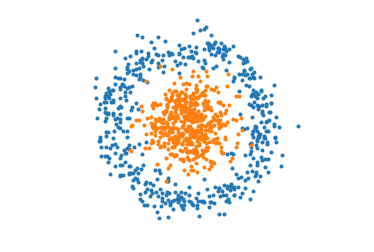

In [36]:
I = find(y==-1)
J = find(y==1)
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal')
plt.axis('off');

Once avaluated on grid points, the kernel define a matrix
$$ K = (\kappa(x_i,x_j))_{i,j=1}^n \in \RR^{n \times n}.  $$

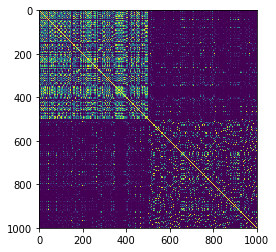

In [37]:
sigma = 1;
K = kappa(X,X,sigma)
plt.imshow(K);

Valid kernels are those that gives rise to positive symmetric matrices
$K$. The linear and Gaussian kernel are valid kernel functions. Other
popular kernels include the polynomial kernel $ \dotp{x}{y}^a $ for $a
\geq 1$ and the Laplacian kernel $ \exp( -\norm{x-y}^2/\si ) $.


The kernelized Logistic minimization reads
  $$ \umin{h} F(h) \eqdef \Ll(K h,y). $$

In [38]:
def F(h,K,y): return L(K.dot(h),y)
def nablaF(h,K,y): return K.transpose().dot( nablaL(K.dot(h),y) )

This minimization can be related to an infinite dimensional optimization
problem where one minimizes directly over the function $f$. This
is shown to be equivalent to the above finite-dimenisonal optimization problem
thanks to the theory of RKHS.

__Exercise 4__

Implement a gradient descent to minimize $F(h)$.
Monitor the energy decay.
Test different step size, and compare with the theory.

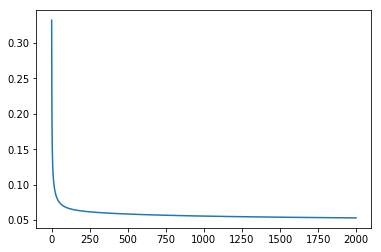

In [40]:
run -i nt_solutions/ml_3_classification/exo4

In [41]:
## Insert your code here.

Once this optimal $h$ has been found, class probability at a point
$x$ are obtained as
  $$ (\th(f_h(x)), 1-\th(f_h(x)) $$
where $f_h$ has been defined above.


We evaluate this classification probability on a grid.

In [42]:
q = 201
tmax = 5
t = np.linspace(-tmax,tmax,num=q)
[B,A] = np.meshgrid( t,t )
G = np.vstack([A.flatten(), B.flatten()]).transpose()
K1 = kappa(G,X,sigma)
Theta = theta( K1.dot(h) )
Theta = Theta.reshape((q,q))

Display the classification probability.

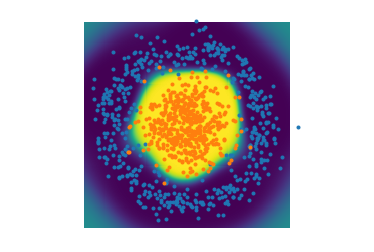

In [46]:
plt.clf
plt.imshow(Theta.transpose(), origin="lower",  extent=[-tmax, tmax, -tmax, tmax])
plt.plot(X[I,0], X[I,1], '.')
plt.plot(X[J,0], X[J,1], '.')
plt.axis('equal')
plt.axis('off');

__Exercise 5__

Display evolution of the classification probability with $\sigma$

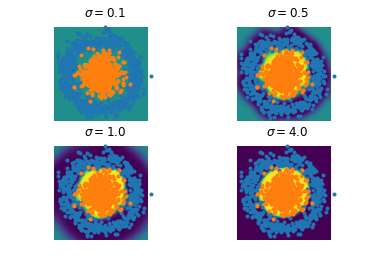

In [52]:
run -i nt_solutions/ml_3_classification/exo5

In [49]:
## Insert your code here.

__Exercise 6__

Separate the dataset into a training set and a testing set. Evaluate the classification performance
for varying $\si$. Try to introduce regularization and minmize
$$ \umin{h} F(h) \eqdef \Ll(K h,y) + \la R(h) $$
where for instance $R=\norm{\cdot}_2^2$ or  $R=\norm{\cdot}_1$.

In [53]:
run -i nt_solutions/ml_3_classification/exo6

In [54]:
## Insert your code here.

Multi-Classes Logistic Classification
-------------------------------------
The logistic classification method is extended to an arbitrary number
$k$ of classes by considering a familly of weight vectors $ w_\ell
$_{\ell=1}^k, which are conveniently stored as columns of matrix $W \in \RR^{p \times k}$.


This allows to model probabilitically the belonging of a point $x \in \RR^p $ to a
the classes using an exponential model
  $$ h(x) = \pa{ \frac{ e^{-\dotp{x}{w_\ell}} }{ \sum_m e^{-\dotp{x}{w_m}} } }_\ell $$
This vector $h(x) \in [0,1]^k $ describes the probability of $x$
belonging to the different classes, and $ \sum_\ell h(x)_\ell = 1 $.


The computation of $w$ is obtained by solving a maximum likelihood
estimator
   $$ \umax{w \in \RR^k} \frac{1}{n} \sum_{i=1}^n \log( h(x_i)_{y_i} ) $$
where we recall that $y_i \in \{1,\ldots,k\}$ is the class index of
point $x_i$.


This is conveniently rewritten as
  $$ \umin{w} \sum_i \text{LSE}( XW )_i - \dotp{XW}{D} $$
where $D \in \{0,1\}^{n \times k}$ is the binary class index matrices
  $$  D_{i,\ell} = \choice{
          1 \qifq y_i=\ell, \\
          0 \quad \text{otherwise}.
      }
   $$
and LSE is the log-sum-exp operator
  $$ \text{LSE}(S) = \log\pa{ \sum_\ell \exp(S_{i,\ell}) } \in \RR^n. $$

In [60]:
def LSE0(S): return np.log( np.exp(S).sum(axis=1,keepdims=1))

The computation of LSE is
unstable for large value of $S_{i,\ell}$ (numerical overflow, producing NaN), but this can be
fixed by substracting the largest element in each row,
since $ \text{LSE}(S+a)=\text{LSE}(S)+a $ if $a$ is constant along rows. This is
the [celebrated LSE trick](https://en.wikipedia.org/wiki/LogSumExp).

In [61]:
def max2(S): return np.tile( S.max(axis=1,keepdims=1), (1,S.shape[1]) )
def LSE(S): return LSE0( S-max2(S) ) + S.max(axis=1,keepdims=1)

In [62]:
# check equality of LSE and LSE0
S = np.random.randn(4,5)
np.linalg.norm( LSE(S)-LSE0(S) )

0.0

The gradient of the LSE operator is the
<https://en.wikipedia.org/wiki/Softmax_function soft-max operator>
$$  \nabla \text{LSE}(S) = \text{SM}(S) \eqdef
      \pa{
          \frac{
                  e^{S_{i,\ell}}
              }{
                  \sum_m e^{S_{i,m}}
              } }   $$

In [63]:
def SM0(S): return np.exp(S) / np.tile( np.exp(S).sum(axis=1,keepdims=1), (1, S.shape[1]) );

Similarely to the LSE, it needs to be stabilized.

In [64]:
def SM(S): return SM0(S-max2(S))

In [67]:
# Check equality of SM and SM0
np.linalg.norm( SM(S)-SM0(S) )

1.6840225185876241e-16

We load a dataset of $n$ images of size $p = 8 \times 8$, representing digits from 0
to 9 (so there are $k=10$ classes).


Load the dataset and randomly permute it.
Separate the features $X$ from the data $y$ to predict information.

In [68]:
from scipy import io
name = 'digits';
U = io.loadmat('nt_toolbox/data/ml-' + name)
A = U['A']
A = A[np.random.permutation(A.shape[0]),:]
X = A[:,0:-1]
y = A[:,-1]

$n$ is the number of samples, $p$ is the dimensionality of the features, $k$
the number of classes.

In [71]:
[n,p] = X.shape
p1 = int(np.sqrt(p))
CL = np.unique(y)  # list of classes.
k = np.size(CL)

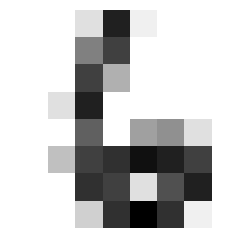

In [73]:
f = X[1,:]
f = np.reshape( f,(p1,p1) )
plt.imshow(f.max()-f, cmap="gray")
plt.axis('off');

Display a few samples digits

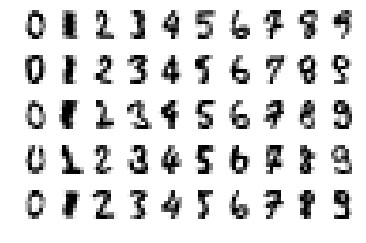

In [74]:
q = 5
plt.clf
for i in np.arange(0,k):
    I = find(y==CL[i])
    for j in np.arange(0,q):
        f = X[I[j],:];
        f = np.reshape( f,(p1,p1) )
        plt.subplot(q,k, j*k+i+1 )
        plt.imshow(f.max()-f, cmap="gray")
        plt.axis('off')

Perform dimensionality reduction using PCA. 

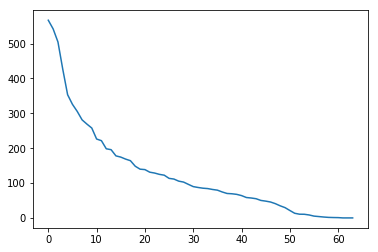

In [75]:
# substract mean
X1 = X-X.mean(axis=0)
# covariance, not used
C = X1.transpose().dot( X1 )
# SVD, the V matrix contains the eigenvectors to project onto
# WARNING: Matlab and Python do not have the same convention for the SVD. 
#     For Python, it reads X1=U*diag(s)*V
#     For Matlab, it reads X1=U*diag(s)*transpose(V)
U, s, V = np.linalg.svd(X1)
Xr = X1.dot( V.transpose() )
# display the decay of eigenvalues
plt.plot(s);

Display in 2D.

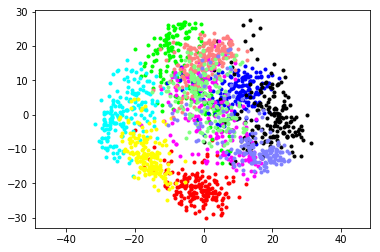

In [76]:
col = np.array( [ [1,0,0], [0,1,0], [0,0,1], [0,0,0], [0,1,1], [1,0,1], [1,1,0], [1,.5,.5], [.5,1,.5], [.5,.5,1]  ] ).transpose()
for i in np.arange(0,k):
    I = find(y==CL[i])
    plt.plot(Xr[I,0], Xr[I,1], '.', color=col[:,i])
plt.axis('equal');

Display in 3D.

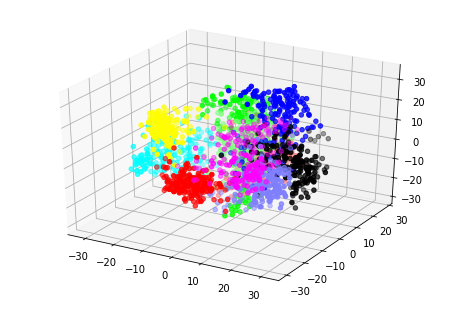

In [79]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
plt.clf
for i in np.arange(0,k):
    I = find(y==CL[i])
    ax.scatter(Xr[I,0], Xr[I,1], Xr[I,2], '.', color=col[:,i])
plt.axis('tight');

Compute the $D$ matrix.

In [81]:
D = np.double( np.tile( CL, (n,1) ) == np.tile( y, (k,1) ).transpose() )

Dot product between two vectors.

In [82]:
def dotp(x,y): return x.flatten().dot( y.flatten().transpose() )

Define the energy $E(W)$.

In [83]:
def E(W): return 1/n*( LSE(X.dot(W)).sum() - dotp(X.dot(W),D)  )

Define its gradients
  $$ \nabla E(W) =  \frac{1}{n} X^\top ( \text{SM}(X W) - D ).  $$

In [84]:
def nablaE(W): return 1/n * X.transpose().dot( SM(X.dot(W)) -  D  )

__Exercise 7__

Implement a gradient descent
$$ W_{\ell+1} = W_\ell - \tau_\ell \nabla E(W_\ell). $$
Monitor the energy decay.

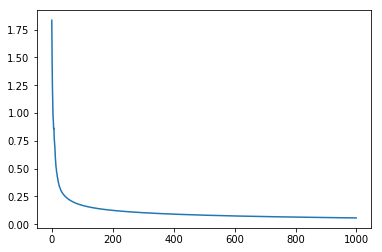

In [86]:
run -i nt_solutions/ml_3_classification/exo7

In [55]:
## Insert your code here.

Generate a 2D grid of points over PCA space and map it to feature space.

In [87]:
M = np.abs(Xr.flatten()).max()
q = 201
t = np.linspace(-M,M,num=q)
[B,A] = np.meshgrid(t,t)
G0 = np.vstack([A.flatten(), B.flatten()]).transpose()
Xmean = np.tile( X.mean(axis=0,keepdims=1), (q**2,1) )
G = G0.dot(V[0:2,:]) + Xmean

Evaluate class probability associated to weight vectors on this grid.

In [88]:
Theta = SM(G.dot(W))
Theta = np.reshape(Theta, (q, q, k) )

Display each probablity map.

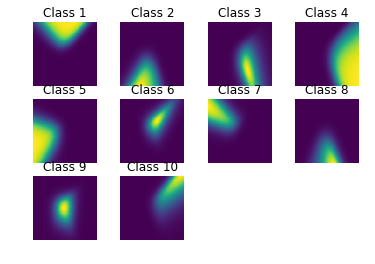

In [90]:
plt.clf
for i in np.arange(0,k):
    plt.subplot(3,4,i+1)
    plt.imshow(Theta[:,:,i].transpose());
    plt.title('Class ' + str(i+1));
    plt.axis('off')

Build a single color image of this map.

In [91]:
R = np.zeros((q,q,3))
for i in np.arange(0,k):
    for a in np.arange(0,3):
        R[:,:,a] = R[:,:,a] + Theta[:,:,i] * col[a,i]

Display.

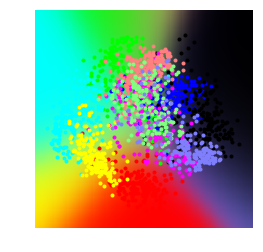

In [92]:
plt.clf
plt.imshow(R.transpose((1, 0, 2)), origin="lower", extent=[-M,M,-M,M])
for i in np.arange(0,k):
    I = find(y==CL[i])
    plt.plot(Xr[I,0], Xr[I,1], '.', color=col[:,i])
plt.axis('off');

__Exercise 8__

Separate the dataset into a training set and a testing set. Evaluate the classification performance
and display the confusion matrix. You can try the impact of kernlization and regularization.

In [93]:
run -i nt_solutions/ml_3_classification/exo8

In [62]:
## Insert your code here.